# Exploratory Data Analysis For Housing Prices Dataset | 18/05/2023
___

## First Look

In [32]:
import pandas as pd
import numpy as np

#import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Read the raw_data
import os, sys
project_dir = os.path.pardir
fp_raw_data = os.path.join(project_dir,'data/raw/train.csv')
raw_data = pd.read_csv(fp_raw_data, index_col='Id')

In [34]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### 1) Missing Values

Check for the year information has missing values

In [35]:
date_columns = ['YrSold', 'MoSold', 'YearRemodAdd', 'YearBuilt', 'GarageYrBlt']
display( raw_data[date_columns].isna().any() )
display( raw_data[date_columns].describe() )

YrSold          False
MoSold          False
YearRemodAdd    False
YearBuilt       False
GarageYrBlt      True
dtype: bool

,YrSold,MoSold,YearRemodAdd,YearBuilt,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,2007.815753,6.321918,1984.865753,1971.267808,1978.506164
std,1.328095,2.703626,20.645407,30.202904,24.689725
min,2006.000000,1.000000,1950.000000,1872.000000,1900.000000
25%,2007.000000,5.000000,1967.000000,1954.000000,1961.000000
50%,2008.000000,6.000000,1994.000000,1973.000000,1980.000000
75%,2009.000000,8.000000,2004.000000,2000.000000,2002.000000
max,2010.000000,12.000000,2010.000000,2010.000000,2010.000000


In [36]:
raw_data[date_columns].isna().any()

YrSold          False
MoSold          False
YearRemodAdd    False
YearBuilt       False
GarageYrBlt      True
dtype: bool

Date data has no outliers and no missing values  
**YrSold & MoSold** columns leaks data for predicting just 'house value', since at the prediction time that value is not yet given the prediction goal should be rephrased as 'value at prediction time'.  
Data collection is limited with year 2010. -> For predicting the model it should be transformed into column 'Age When Sold' to overcome facing with a house built after 2010.  
> TODO: Create 'Age When Sold' column from, 'YrSold' & YearBuilt columns
___

In [39]:
data_missing_columns = raw_data.columns[raw_data.isna().any()]
raw_data[data_missing_columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We know that columns that contains data about: _garage, fireplace, basement, pool & alley_ left empty if the house do not have a garage.  
Garage columns will be dropped out of the comparisons.  
Additionally all garage columns will be checked together to see if they miss data on same rows.

In [40]:
#garage block:
garage_columns = raw_data.columns[raw_data.columns.str.contains(r'Garage*')]
garage_columns

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [41]:
raw_data[garage_columns].loc[ raw_data['GarageCond'].isnull() ].sum()

GarageType        0
GarageYrBlt     0.0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
dtype: object

This confirms non-existent garages are empty rows.  
> #TODO add a categorical column for garage whether it exists or not.

In [42]:
#seperate garage from remeaining missing columns
data_missing_columns = data_missing_columns.difference(garage_columns)

In [43]:
#BasementBlock:
basement_columns = raw_data.columns[raw_data.columns.str.contains(r'Bsmt*')]
basement_columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [44]:
raw_data[basement_columns].loc[ raw_data['BsmtQual'].isnull() ].sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: object

This confirms all non-existent basements are empty rows.  
> #TODO add a categorical column for basement whether it exists or not.

In [45]:
#seperate basement from remeaining missing columns
data_missing_columns = data_missing_columns.difference(basement_columns)

In [46]:
#Also dropping out single columns of missing values indicating non existent feature: Pool, Fireplace, Fence, Masonery, Miscellaneous Feature
data_missing_columns = data_missing_columns.difference(['PoolQC', 'Fence', 'Alley', 'FireplaceQu', 'MasVnrArea', 'MasVnrType', 'MiscFeature'])
data_missing_columns

Index(['Electrical', 'LotFrontage'], dtype='object')

This remains only 2 columns of missing values

|Column|Type|# na|
|--|--|--|
|Electrical|Categorical|1|
|LotFrontage|Numeric|259|

In [47]:
raw_data[raw_data['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [48]:
len( raw_data[raw_data['LotFrontage']==0]) 

0

Electrical data has only 1 missing value, and data description gives a standard value 'SBrkr'. It seems useful to fill with standard value.
> #TODO insert 'Sbrkr' value into  the Electrical column.

Only remaining column Lot Frontage Value indicates frontage to the street. And since there is no 0 value assigned to it we will take missing values as indicator of non existence once again.

**Therefore we will fill all columns with missing values with int or str 0 with respect to dtypes.**

In [117]:
raw_data[data_missing_columns].dtypes

Electrical      object
LotFrontage    float64
dtype: object

### 2) Numeric columns

Data description, indicates some of the categorical columns are encoded ordinally therefore should bo considered as categorical not numeric.  
Those columns are: ['OverallQual', 'OverallCond', 'MSSubClass]

In [277]:
#take numeric columns and discard categorical, ordinally encoded cols
numeric_columns = raw_data.select_dtypes(include=np.number).columns.difference(['OverallQual', 'OverallCond', 'MSSubClass'])
#also take out date columns
numeric_columns = numeric_columns.difference(date_columns)
numeric_data = raw_data[numeric_columns]

In [278]:
numeric_data.describe()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,...,5.844521,103.685262,43.489041,46.660274,2.758904,180921.195890,15.060959,6.517808,1057.429452,94.244521
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,...,48.623081,181.066207,496.123024,66.256028,40.177307,79442.502883,55.757415,1.625393,438.705324,125.338794
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,0.000000,5.000000,795.750000,0.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,...,0.000000,0.000000,0.000000,25.000000,0.000000,163000.000000,0.000000,6.000000,991.500000,0.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,...,0.000000,166.000000,0.000000,68.000000,0.000000,214000.000000,0.000000,7.000000,1298.250000,168.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,572.000000,1600.000000,15500.000000,547.000000,738.000000,755000.000000,480.000000,14.000000,6110.000000,857.000000


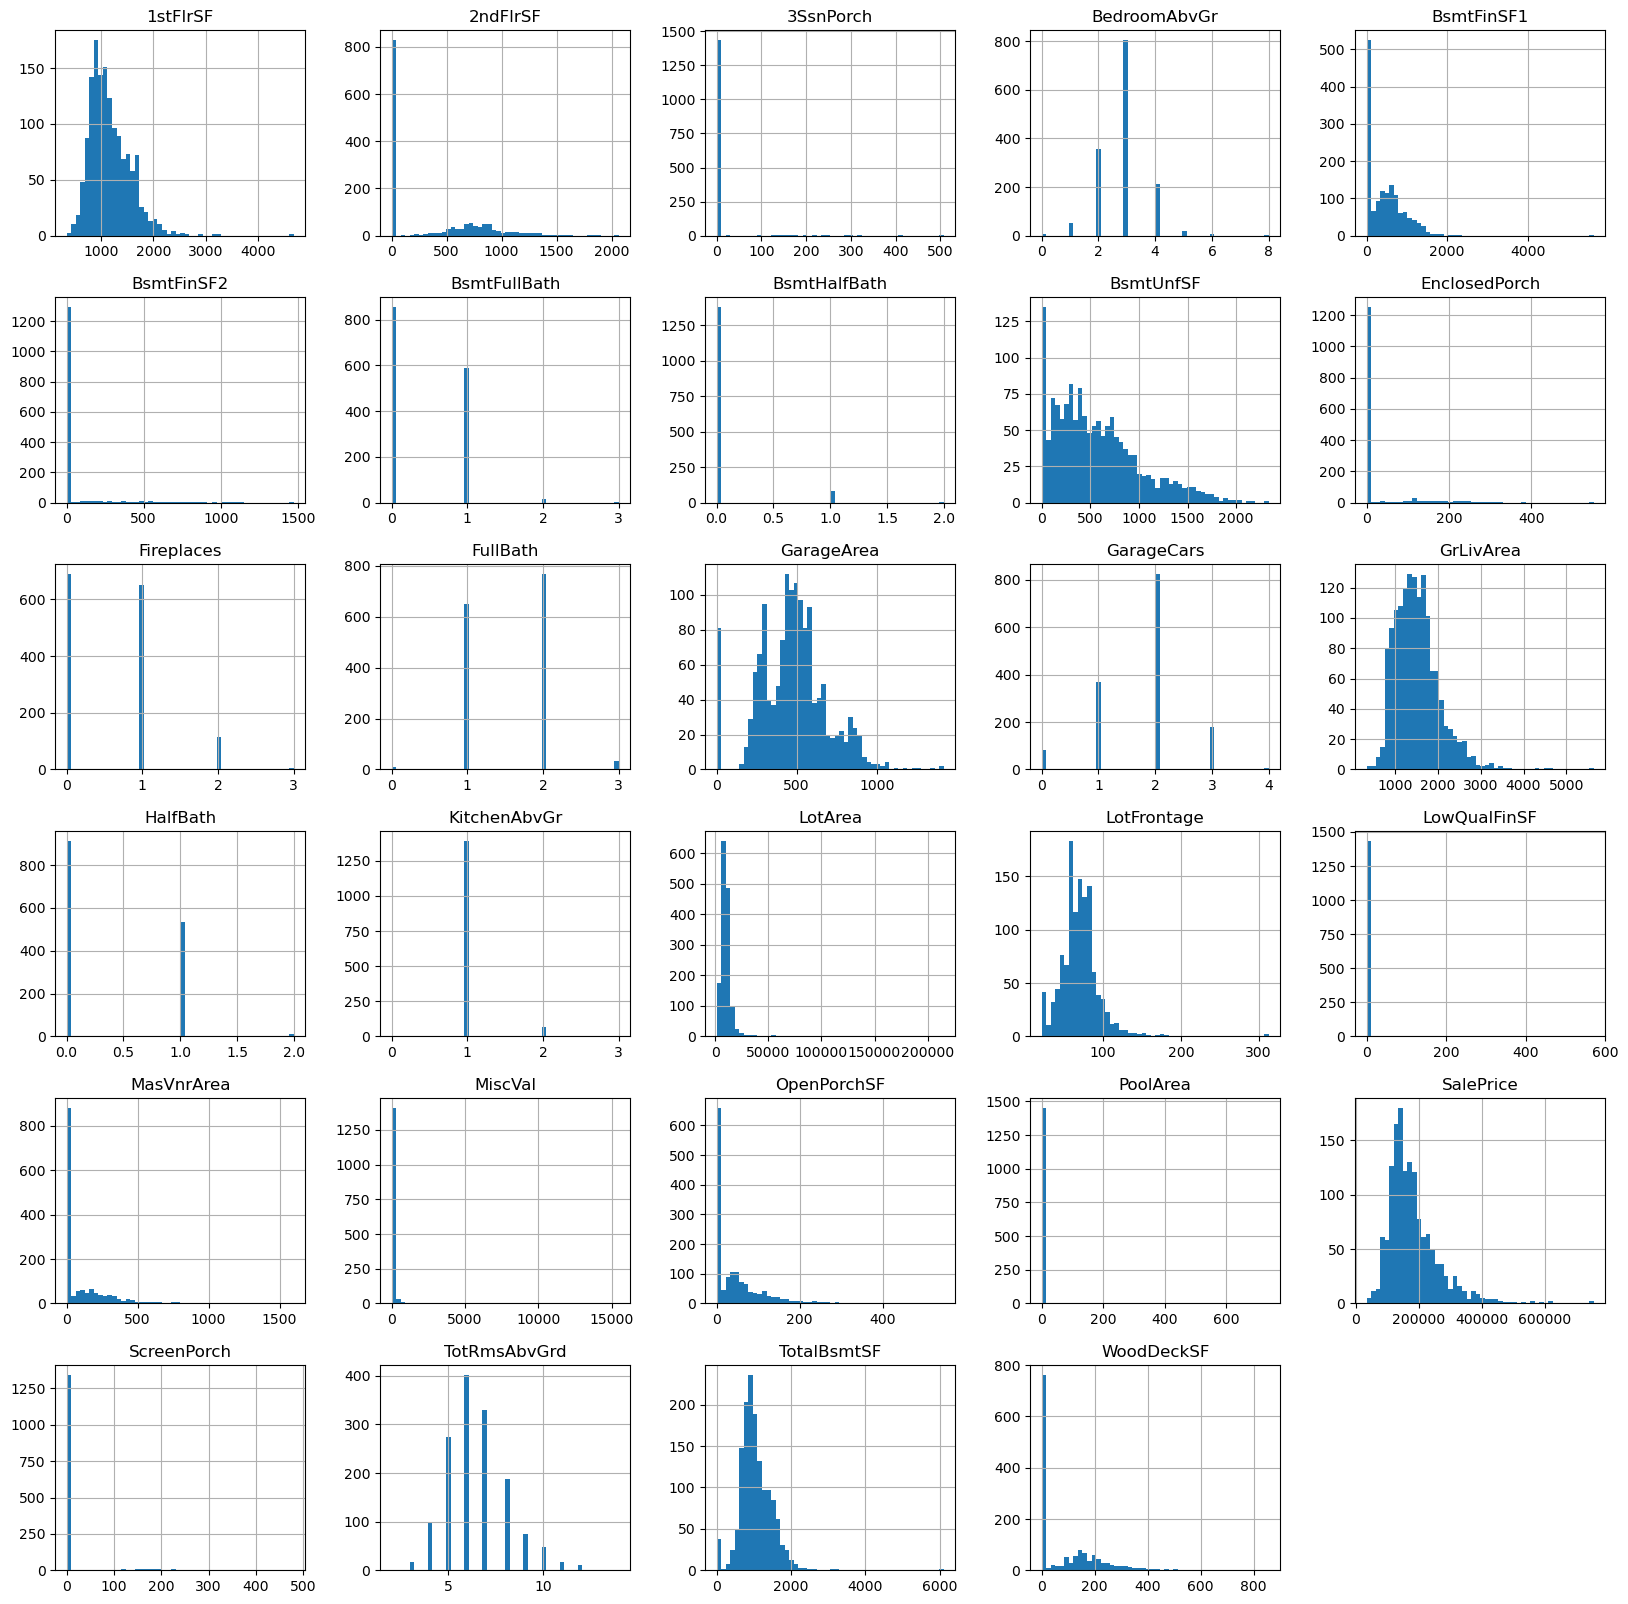

In [280]:
numeric_data.hist(bins=50, figsize=(20,20))
plt.show()

SalePrice is skewed training data by stratifying could be useful.
> TODO: Stratify train test split with sale price data.

#### Choosing obvious features from correalation data

<Axes: >

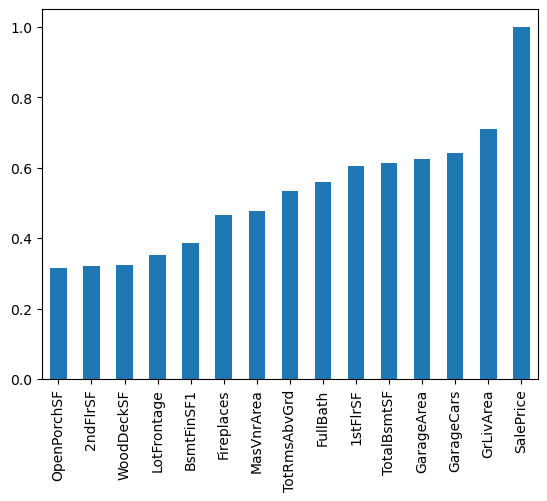

In [294]:
numeric_correlation = numeric_data.corrwith(numeric_data.SalePrice, numeric_only=True)
numeric_correlation[abs(numeric_correlation)>0.3].sort_values().plot.bar()

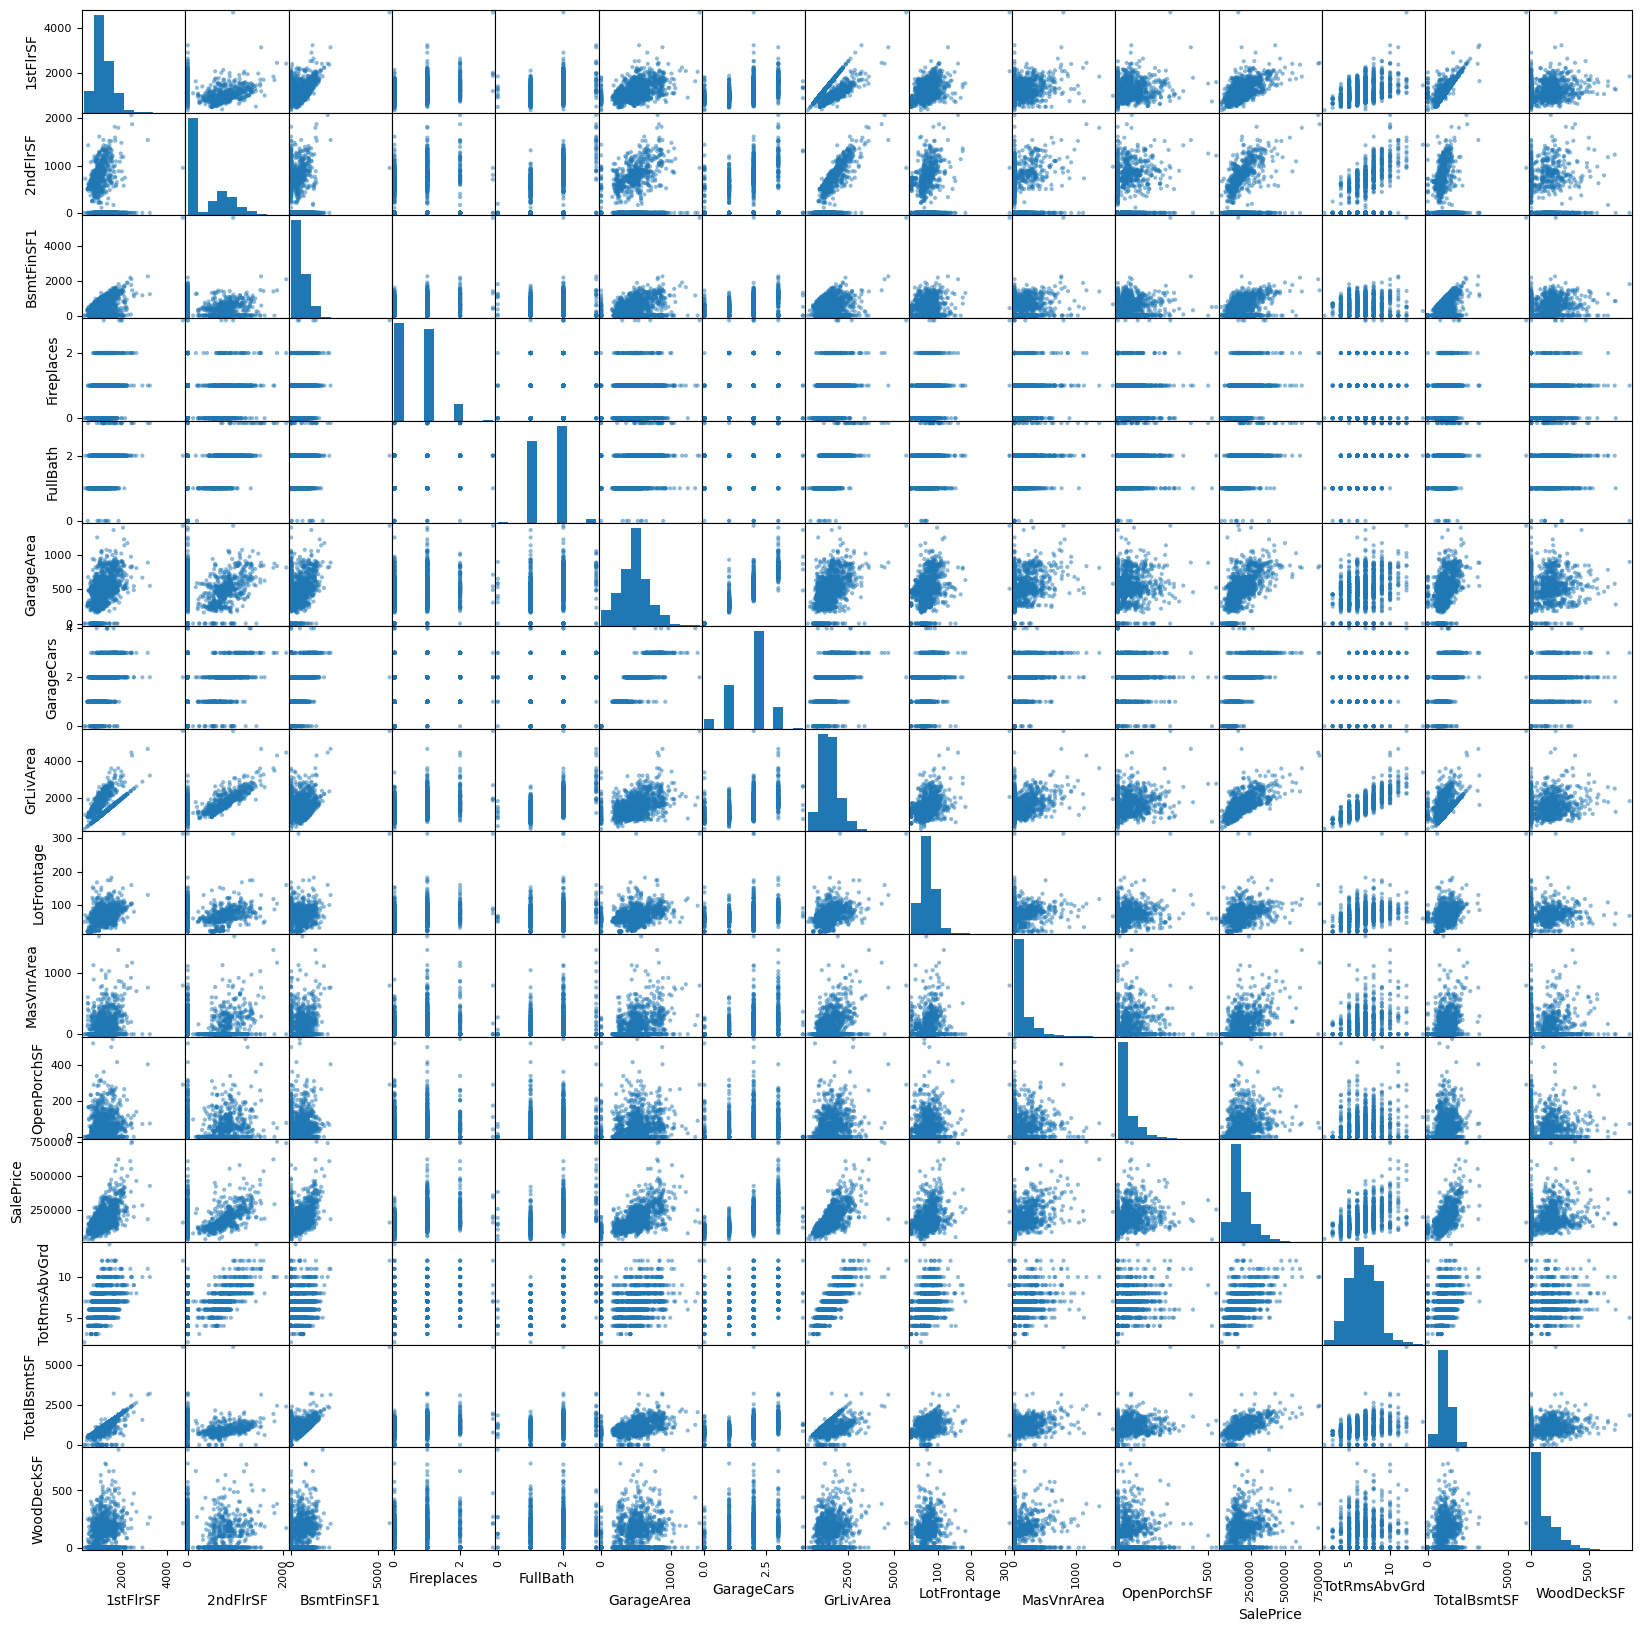

In [301]:
obvious_numeric_features = numeric_correlation[abs(numeric_correlation)>0.3].index
pd.plotting.scatter_matrix(raw_data[obvious_numeric_features], figsize=(20,20))
plt.show()

### 3) Categoric Values

In [118]:
#raw_data[['OverallQual', 'OverallCond', 'MSSubClass']] = raw_data[['OverallQual', 'OverallCond', 'MSSubClass']].astype('object')
categoric_columns = raw_data.select_dtypes('object').columns
categoric_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
categoric_data = raw_data[categoric_columns]

### Experiment between attributes
___

In [122]:
numeric_data

NameError: name 'numeric_data' is not defined

In [ ]:
X_train.plot(kind='scatter', grid=True, colormap='jet', colorbar=True, sharex=False, legend=True, alpha=0.2,
             x='longitude', y='latitude', s=X_train.population/100,
             c=y_train.median_house_value)

In [19]:
corr_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]

In [20]:
corr_matrix = pd.concat([X_train[corr_columns], y_train],axis=1).corr()

In [ ]:
sns.heatmap( corr_matrix )

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
longitude            -0.043439
latitude             -0.146360
Name: median_house_value, dtype: float64

In [33]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

In [ ]:
plt = pd.plotting.scatter_matrix(pd.concat([X_train, y_train], axis=1)[attributes], figsize=(10,10))

In [37]:
df = pd.concat([X_train, y_train], axis=1)

In [ ]:
df.plot(kind='scatter', x='median_income', y='median_house_value', grid=True)

In [44]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [45]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
rooms_per_house       0.177089
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
people_per_house     -0.024845
longitude            -0.043439
latitude             -0.146360
bedrooms_ratio       -0.259403
Name: median_house_value, dtype: float64

In [ ]:
X_train['income_cat'] = pd.cut( X_train.median_income, bins=[0,1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [ ]:
X_train.income_cat.value_counts().sort_index().plot.bar(grid=True)
plt.xlabel('Income Category'); plt.ylabel('Number of districts')

## Delete Down

In [378]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [379]:
df = pd.read_csv( project_path.joinpath('data/raw/housing/housing.csv'))


In [380]:
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('scaler', MinMaxScaler(feature_range=(-1,1)))
    ('scaler', StandarScaler(feature_range=(-1,1)))

])

NameError: name 'StandarScaler' is not defined

In [381]:
categoric_cols = train.select_dtypes(include=['object']).columns
categoric_transformer = Pipeline(steps=[
    #('ordinal', OrdinalEncoder()),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [382]:
preprocessor =  ColumnTransformer( transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categoric_transformer, categoric_cols)
    ])

In [383]:
#model = RandomForestRegressor(n_estimators=100, random_state=0)
model = LinearRegression()

In [384]:
pipe = Pipeline( steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [385]:
pipe.fit(train, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
valid_labels = valid['median_house_value'].copy()
valid = valid.drop('median_house_value', axis=1)

In [388]:
pipe.score(valid, valid_labels)

0.6393300819889421

In [389]:
predictions = pipe.predict(valid)
predictions = pd.DataFrame( predictions, index=valid.index )
final = pd.concat([predictions, valid_labels, valid[['latitude','longitude']]], axis=1 )
final.columns = ['predicted', 'real', 'lat', 'lon']
final['error'] = final.real-final.predicted

In [390]:
final.head()

,predicted,real,lat,lon,error
2124,85464.236389,103600.0,38.92,-120.00,18135.763611
18883,71620.620203,93800.0,33.65,-116.90,22179.379797
11665,330499.526724,349000.0,37.75,-122.45,18500.473276
20190,418940.803225,500001.0,37.21,-121.87,81060.196775
19991,204449.299832,243800.0,36.61,-121.92,39350.700168


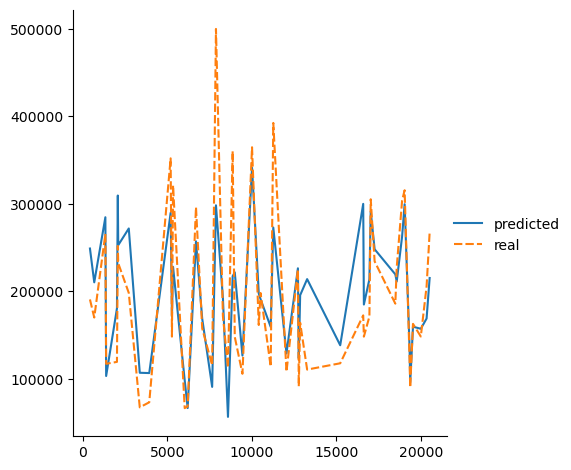

In [391]:
sns.relplot(kind='line', data=final.iloc[100:150, 0:2] )

<Axes: xlabel='lat', ylabel='lon'>

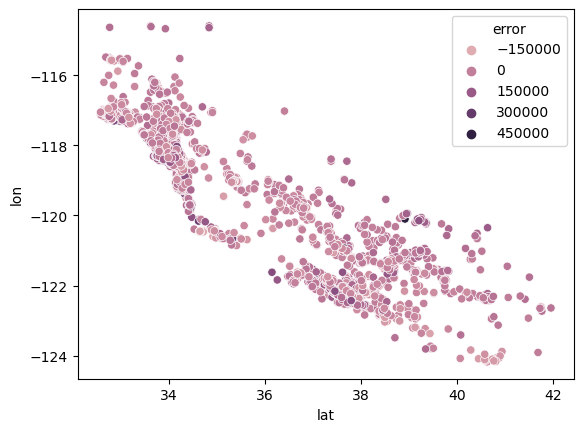

In [392]:
sns.scatterplot(data=final, x='lat', y='lon', hue=final.error )